# 2. Datos

En el [sitio oficial](https://github.com/rois-codh/kmnist) del conjunto de datos que usaremos en este proyecto se hallan tres versiones:

 - __Kuzushiji-MNIST__: Contiene 70.000 imágenes en escala de grises, con dimensiones 28x28, perteneciente a 10 clases. Este conjunto de datos se encuentra perfectamente balanceado, justo como el MNIST original.
 - __Kuzushiji-49__: Contiene 270.912 imágenes distribuidas en 49 clases, siendo éste una extensión del conjunto Kuzushiji-MNIST (descrito anteriormente).
 - __Kuzushiji-Kanji__: Esta es la versión más retadora de los datos, puesto que es mucho más grande y desbalanceada que las otras dos, con 3.832 clases, contenidas en 140.426 imágenes de caracteres comunes y raros. 
 
Para mantener el proyecto corto, procedamos a explorar las primeras dos encarnaciones de los datos en las próximas celdas.

## Preparativos

Los datos se encuentran en el directorio `data` en formato `.npz` el cual es un formato comprimido utilizado por NumPy. Escribamos una función para cargar la información contenida en dicho directorio:

In [1]:
import numpy as np
import pandas as pd

def load_data(images_path, labels_path, mapping_path):
    
    with np.load(images_path) as images:
        X = images['arr_0']
        
    with np.load(labels_path) as labels:
        y = labels['arr_0']
    
    mapping = pd.read_csv(mapping_path)
    
    return X, y, mapping

También necesitaremos una función para visualizar una muestra aleatoria de los datos, de manera que sepamos a lo que nos enfrentamos. Implementémosla en la celda siguiente:

In [2]:
import matplotlib.pyplot as plt

def plot_random_sample(X, y, mappings, sample_size=12):
    fig = plt.figure(figsize=(25, 25))
    
    random_sample_indices = np.random.randint(0, len(y), sample_size)
    
    for i, sample_index in enumerate(random_sample_indices):
        ax = fig.add_subplot(1, sample_size, i + 1, xticks=[], yticks=[])
        image = X[sample_index]
        ax.imshow(image, cmap='gray')
        ax.set_title(mappings.at[y[sample_index], 'codepoint'])

Finalmente, es de utilidad tener una función que nos muestre un gráfico de barras con la distribución por clases.

In [3]:
def plot_distribution(X, y, mapping):
    categories = mapping[['codepoint']].values[:, 0]
    y_pos = np.arange(len(categories))
    count_per_category = [len(y[y == i]) for i in range(len(categories))]

    plt.bar(y_pos, count_per_category, align='center')
    plt.xticks(y_pos, y_pos)
    plt.ylabel('Count')
    plt.title('Number of images per category.')
    plt.rcParams['figure.figsize'] = (30, 10)
     
    plt.show()

## Explorando Kuzushiji-MNIST

Empecemos explorando la versión más sencilla del conjunto de datos. 

Comencemos cargando la información:

In [4]:
X_kmnist, y_kmnist, mapping_kmnist = load_data('./data/kmnist-train-imgs.npz', './data/kmnist-train-labels.npz', './data/kmnist_classmap.csv')

Veamos cuál es el mapeo de clases a símbolos Kanji:

In [5]:
mapping_kmnist

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


La página oficial del conjunto de datos afirma que están perfectamente balanceados (es decir, el mismo número de instancias por clases). Verifiquemos esto:

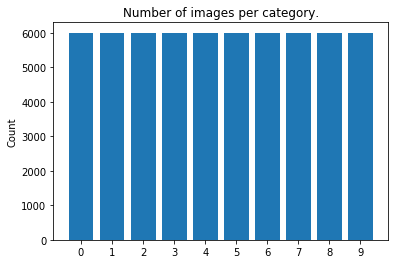

In [6]:
plot_distribution(X_kmnist, y_kmnist, mapping_kmnist)

Fabuloso. Trabajar con un conjunto de datos balanceado siempre es mucho más sencillo, dado que podemos apoyarnos en la _exactitud_ (en inglés, accuracy) como medida de rendimiento.

Veamos unas cuantas imágenes:

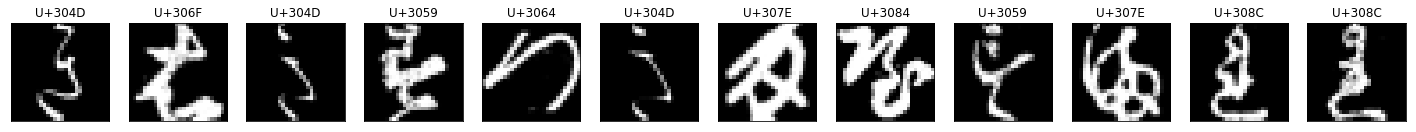

In [7]:
plot_random_sample(X_kmnist, y_kmnist, mapping_kmnist)

De inmediato notamos que estas imágenes son bastante más complejas de interpretar que las del MNIST original. Por ejemplo, la primera, segunda y tercera imagen corresponden al mismo caracter, pero son muy diferentes entre ellas. Esto presentará un reto más que interesante para los modelos que desarrollaremos en los siguientes notebooks.

## Explorando Kuzushiji-49

Pasemos ahora a explorar la versión extendida de Kuzushiji-MNIST, Kuzushiji-49

Para empezar carguemos la información:

In [8]:
X_k49, y_k49, mapping_k49 = load_data('./data/k49-train-imgs.npz', './data/k49-train-labels.npz', './data/k49_classmap.csv')

Veamos cuál es el mapeo de clases a símbolos Kanji:

In [9]:
mapping_k49

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


A diferencia de la versión previa del conjunto de datos, una distribución uniforme de los datos no está garantizada para Kuzushiji-49. Dibujemos su gráfico de barra y veamos qué tal luce:

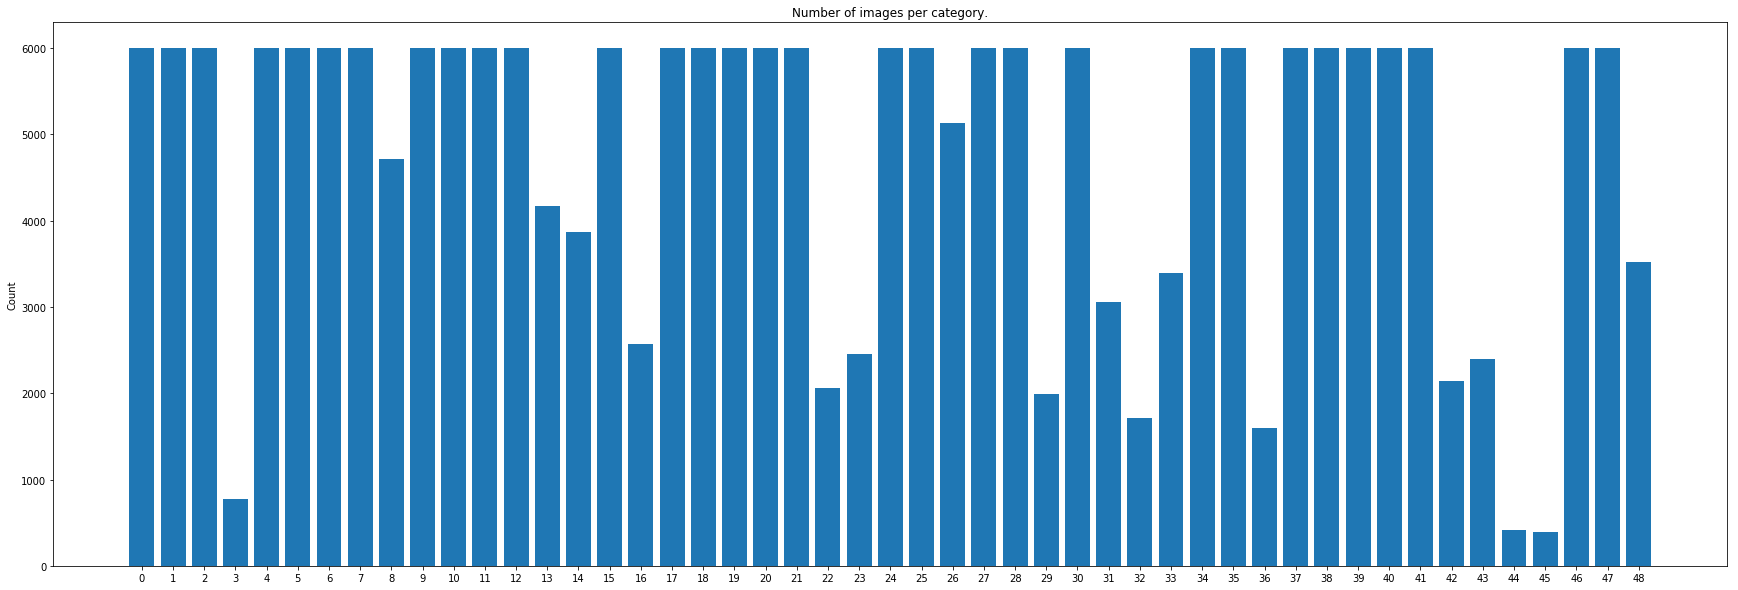

In [10]:
plot_distribution(X_k49, y_k49, mapping_k49)

Como era de esperar, los datos no están perfectamente distribuidos como antes. Podemos observar que categorías como la 3, 44 y 45 tienen muchos menos ejemplos que otras como la 0, 1 y 47. Esto, sin duda, supondrá un reto al momento de probar distintos modelos, dado que tendremos que tener en cuenta este desbalance al momento de medir el desempeño de cada uno de ellos. En estas circunstancias es mejor usar otras métricas que tomen en cuenta una distribución no uniforme de los datos, tales como _F1_, _recall_, _precision_ o _AUROC_.

## Conclusión

Sin dudas, este es un conjunto de datos bastante interesante. El desbalance en Kuzushiji-49 hará de la escogencia de un modelo adecuando algo más retador.

En los notebooks por venir evaluaremos diversas alternativas con el fin de dar con la que mejor se desempeñe. Para ello, nos apoyaremos en el mecanismo de _revisión_ o _spot-checking_ que hemos usado anteriormente [aquí](https://datasmarts.net/es/deteccion-de-carros-usando-deep-learning/).